In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

In [27]:
import numpy as np

In [28]:
import sys
sys.path.append('..')

from my_code import functions as f

# Data

In [29]:
file_path = '../data/energies/Trial/Strings_Energies_10_000.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list)/100
angles_list = np.array([f.string_to_numbers(string) for string in string_list])

In [30]:
X, Y, X_validation, Y_validation = f.create_validating_set(angles_list, score_list, percentage=0.1)

In [31]:
# Define the dataset
input_data = torch.tensor(X, dtype=torch.float32)
target_data = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Define the validation set
input_validation = torch.tensor(X_validation, dtype=torch.float32)
target_validation = torch.tensor(Y_validation, dtype=torch.float32).view(-1, 1)

# Classical model

In [32]:
input_dim = input_data.size(1)

layers =  [nn.Linear(input_dim*1, input_dim*2), nn.ReLU()]
layers += [nn.Linear(input_dim*2, input_dim*3), nn.ReLU()] 
layers += [nn.Linear(input_dim*3, input_dim*3), nn.ReLU()] 
layers += [nn.Linear(input_dim*3, input_dim*2), nn.ReLU()] 
layers += [nn.Linear(input_dim*2, input_dim*1)] 
layers += [nn.Linear(input_dim*1, input_dim*1), nn.ReLU()] * 8
layers += [nn.Linear(input_dim*1, 1          )] 
Net = nn.Sequential(*layers)

In [33]:
# Create an instance of the network
model = Net

In [34]:
# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Training loop
num_epochs = 100
batch_size = 32

losses = []
losses_epochs = []

for epoch in range(num_epochs):
    # Shuffle the dataset
    indices = torch.randperm(input_data.size(0))
    input_data = input_data[indices]
    target_data = target_data[indices]

    losses_epochs.append(0)

    # Mini-batch training
    for i in range(0, input_data.size(0), batch_size):
        inputs = input_data[i:i+batch_size]
        targets = target_data[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the loss
        losses.append(loss.item())

        print('- Epoch [{}/{}], i: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i, input_data.size(0), loss.item()))

        # add to the epoch loss
        losses_epochs[-1] += loss.item() / (input_data.size(0) / batch_size)
    

    # Print the loss for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, losses_epochs[-1]))


- Epoch [1/100], i: [0/9000], Loss: 23.7125
- Epoch [1/100], i: [32/9000], Loss: 16.6080
- Epoch [1/100], i: [64/9000], Loss: 27.9902
- Epoch [1/100], i: [96/9000], Loss: 19.0251
- Epoch [1/100], i: [128/9000], Loss: 21.7922
- Epoch [1/100], i: [160/9000], Loss: 24.4236
- Epoch [1/100], i: [192/9000], Loss: 28.7209
- Epoch [1/100], i: [224/9000], Loss: 21.0300
- Epoch [1/100], i: [256/9000], Loss: 22.1072
- Epoch [1/100], i: [288/9000], Loss: 17.4260
- Epoch [1/100], i: [320/9000], Loss: 22.8445
- Epoch [1/100], i: [352/9000], Loss: 30.1964
- Epoch [1/100], i: [384/9000], Loss: 25.3568
- Epoch [1/100], i: [416/9000], Loss: 18.9858
- Epoch [1/100], i: [448/9000], Loss: 19.5957
- Epoch [1/100], i: [480/9000], Loss: 18.2560
- Epoch [1/100], i: [512/9000], Loss: 18.5091
- Epoch [1/100], i: [544/9000], Loss: 20.7086
- Epoch [1/100], i: [576/9000], Loss: 23.0774
- Epoch [1/100], i: [608/9000], Loss: 17.3114
- Epoch [1/100], i: [640/9000], Loss: 22.8693
- Epoch [1/100], i: [672/9000], Loss: 2

- Epoch [1/100], i: [6656/9000], Loss: 4.7099
- Epoch [1/100], i: [6688/9000], Loss: 8.7846
- Epoch [1/100], i: [6720/9000], Loss: 4.8905
- Epoch [1/100], i: [6752/9000], Loss: 7.9856
- Epoch [1/100], i: [6784/9000], Loss: 7.9832
- Epoch [1/100], i: [6816/9000], Loss: 8.7266
- Epoch [1/100], i: [6848/9000], Loss: 4.4375
- Epoch [1/100], i: [6880/9000], Loss: 5.8280
- Epoch [1/100], i: [6912/9000], Loss: 7.3494
- Epoch [1/100], i: [6944/9000], Loss: 7.2648
- Epoch [1/100], i: [6976/9000], Loss: 4.8978
- Epoch [1/100], i: [7008/9000], Loss: 6.2958
- Epoch [1/100], i: [7040/9000], Loss: 7.4364
- Epoch [1/100], i: [7072/9000], Loss: 5.3227
- Epoch [1/100], i: [7104/9000], Loss: 6.7493
- Epoch [1/100], i: [7136/9000], Loss: 6.6873
- Epoch [1/100], i: [7168/9000], Loss: 9.3814
- Epoch [1/100], i: [7200/9000], Loss: 5.3143
- Epoch [1/100], i: [7232/9000], Loss: 8.5068
- Epoch [1/100], i: [7264/9000], Loss: 5.2630
- Epoch [1/100], i: [7296/9000], Loss: 7.5306
- Epoch [1/100], i: [7328/9000], L

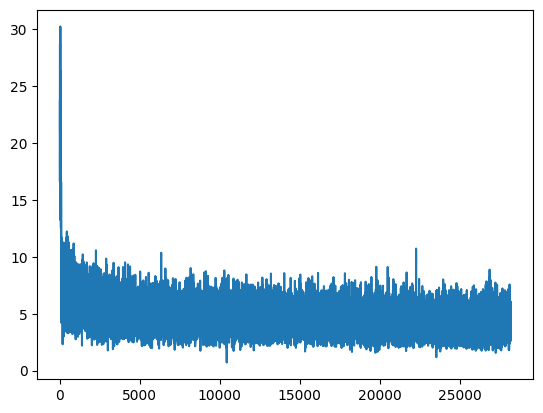

In [38]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

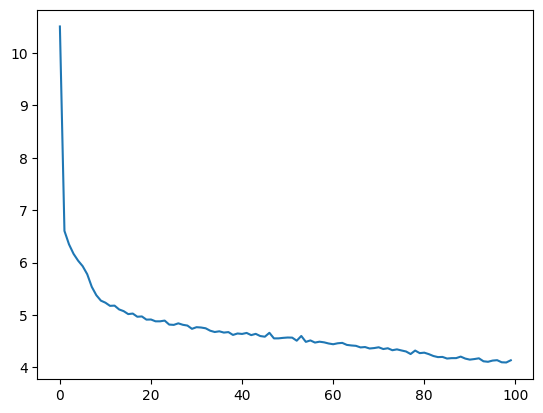

In [39]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(losses_epochs)
plt.show()

In [37]:
avg_loss = 0
for x, (i, t) in enumerate(zip((input_validation), target_validation)):
    loss = criterion(model(i), t)
    avg_loss += loss/len(target_validation)
    print('i: {}, target: {:.3f}, output: {:.3f}, loss: {:.3f}'.format(x, t.item(), model(i).item(), loss))
    print('')

print('Average loss: {:.3f}'.format(avg_loss))

i: 0, target: 6.079, output: 7.975, loss: 3.598

i: 1, target: 2.165, output: 3.560, loss: 1.947

i: 2, target: 0.595, output: 3.435, loss: 8.065

i: 3, target: 3.657, output: 3.329, loss: 0.108

i: 4, target: 4.449, output: 2.948, loss: 2.254

i: 5, target: 4.514, output: 3.826, loss: 0.474

i: 6, target: 4.757, output: 2.703, loss: 4.219

i: 7, target: 7.665, output: 8.357, loss: 0.479

i: 8, target: 3.434, output: 4.616, loss: 1.398

i: 9, target: 3.410, output: 4.019, loss: 0.371

i: 10, target: 6.907, output: 3.942, loss: 8.796

i: 11, target: 4.185, output: 4.779, loss: 0.353

i: 12, target: 1.607, output: 3.104, loss: 2.241

i: 13, target: 3.390, output: 3.384, loss: 0.000

i: 14, target: 2.292, output: 3.941, loss: 2.719

i: 15, target: 0.359, output: 3.979, loss: 13.099

i: 16, target: 7.335, output: 3.653, loss: 13.552

i: 17, target: 1.376, output: 3.626, loss: 5.065

i: 18, target: 3.813, output: 2.206, loss: 2.584

i: 19, target: 2.024, output: 6.118, loss: 16.763

i: 20, 